In [2]:
# 1. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

## LOAD DATA

In [4]:
train_df = pd.read_csv('https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/FeatureEngineering/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/FeatureEngineering/test.csv')

In [6]:
# 3. Pilih fitur dengan korelasi tinggi
selected_features = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
    'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
    'YearBuilt', 'YearRemodAdd'
]

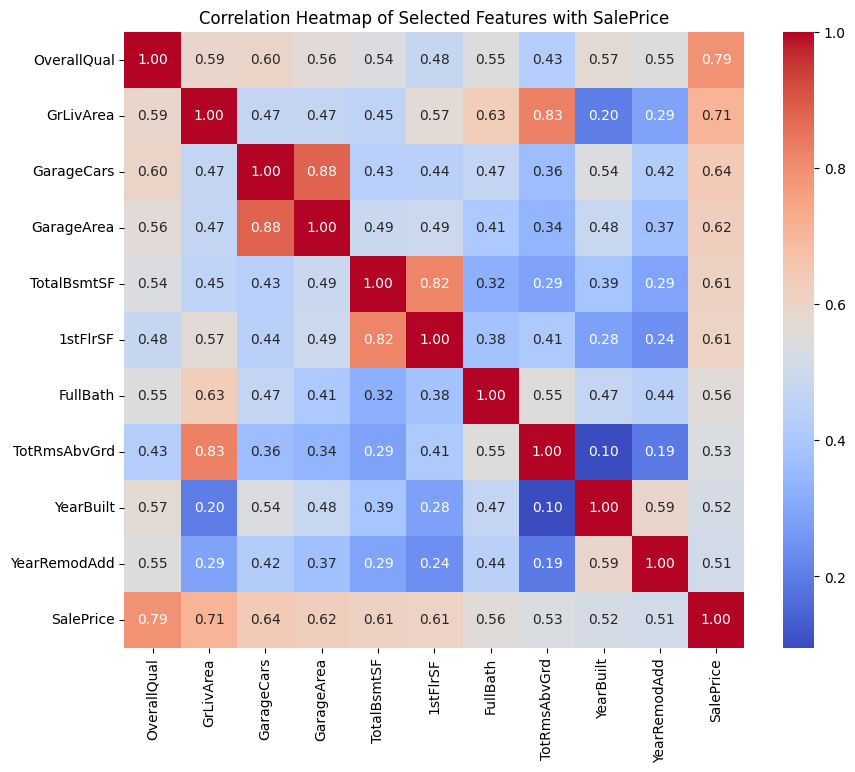

In [7]:
# 4. Korelasi heatmap (bukti grafis)
plt.figure(figsize=(10, 8))
corr_matrix = train_df[selected_features + ['SalePrice']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features with SalePrice')
plt.show()

In [8]:
# 5. Split fitur dan target
X = train_df[selected_features]
y = train_df['SalePrice']

# 6. Split menjadi Train dan Validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# 8. Predict
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)


In [9]:
# 9. Evaluasi fungsi
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

# 10. Hitung hasil
train_mse, train_rmse, train_r2 = evaluate(y_train, y_train_pred)
val_mse, val_rmse, val_r2 = evaluate(y_val, y_val_pred)

In [10]:
# 11. Tampilkan hasil
print("=== Evaluation on Training Set ===")
print(f"MSE: {train_mse:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"R²: {train_r2:.4f}")

print("\n=== Evaluation on Validation Set ===")
print(f"MSE: {val_mse:.2f}")
print(f"RMSE: {val_rmse:.2f}")
print(f"R²: {val_r2:.4f}")

=== Evaluation on Training Set ===
MSE: 1403126581.09
RMSE: 37458.33
R²: 0.7648

=== Evaluation on Validation Set ===
MSE: 1558239575.15
RMSE: 39474.54
R²: 0.7968


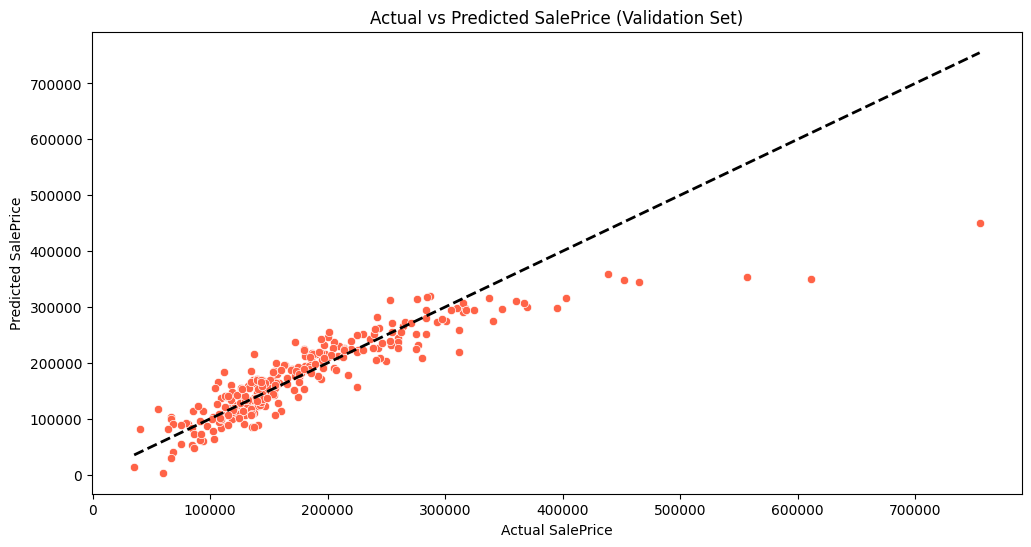

In [11]:
# 12. Visualisasi Prediksi vs Aktual
plt.figure(figsize=(12,6))
sns.scatterplot(x=y_val, y=y_val_pred, color='tomato')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice (Validation Set)')
plt.show()

In [13]:
# 13. Prediksi pada Test Set
# (ingat: test set tidak ada SalePrice, jadi hanya prediksi saja)
X_test = test_df[selected_features]

# Tambahkan impute missing values di sini
X_test = X_test.fillna(X_train.mean())

test_predictions = model.predict(X_test)

test_predictions = model.predict(X_test)

In [14]:
# 14. Simpan prediksi ke file CSV
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_predictions
})
submission.to_csv('submission.csv', index=False)
print("\n✅ File 'submission.csv' berhasil dibuat! (isi prediksi SalePrice pada test set)")